## Setting Up Your Python Environment

In [1]:
# %%capture
# # Install additional dependencies
# !pip install pandas pillow tqdm

# # Install package for creating visually distinct colormaps
# !pip install distinctipy

# # Install utility packages
# !pip install cjm_psl_utils

## Importing the Required Dependencies

In [2]:
# Import Python Standard Library dependencies
from glob import glob
from pathlib import Path

# Import utility functions
from cjm_psl_utils.core import download_file, file_extract

# Import the distinctipy module
from distinctipy import distinctipy

# Import numpy
import numpy as np

# Import the pandas package
import pandas as pd

# Set options for Pandas DataFrame display
pd.set_option('max_colwidth', None)  # Do not truncate the contents of cells in the DataFrame
pd.set_option('display.max_rows', None)  # Display all rows in the DataFrame
pd.set_option('display.max_columns', None)  # Display all columns in the DataFrame

# Import PIL for image manipulation
from PIL import Image

# Import tqdm for progress bar
from tqdm.auto import tqdm

## Loading and Exploring the Dataset

### Setting the Directory Paths

In [3]:
# Define path to store datasets
dataset_dir = Path("/mnt/980_1TB_2/Datasets/")
# Create the dataset directory if it does not exist
dataset_dir.mkdir(parents=True, exist_ok=True)

# Define path to store archive files
archive_dir = dataset_dir/'../Archive'
# Create the archive directory if it does not exist
archive_dir.mkdir(parents=True, exist_ok=True)

pd.Series({
    "Dataset Directory:": dataset_dir, 
    "Archive Directory:": archive_dir
}).to_frame().style.hide(axis='columns')

Dataset Directory:,/mnt/980_1TB_2/Datasets
Archive Directory:,/mnt/980_1TB_2/Datasets/../Archive


### Setting the Dataset Path

In [4]:
# Set the name of the dataset
dataset_name = 'labelme-bounding-box-toy-dataset'

# Construct the HuggingFace Hub dataset name by combining the username and dataset name
hf_dataset = f'cj-mills/{dataset_name}'

# Create the path to the zip file that contains the dataset
archive_path = Path(f'{archive_dir}/{dataset_name}.zip')

# Create the path to the directory where the dataset will be extracted
dataset_path = Path(f'{dataset_dir}/{dataset_name}')

pd.Series({
    "HuggingFace Dataset:": hf_dataset, 
    "Archive Path:": archive_path, 
    "Dataset Path:": dataset_path
}).to_frame().style.hide(axis='columns')

HuggingFace Dataset:,cj-mills/labelme-bounding-box-toy-dataset
Archive Path:,/mnt/980_1TB_2/Datasets/../Archive/labelme-bounding-box-toy-dataset.zip
Dataset Path:,/mnt/980_1TB_2/Datasets/labelme-bounding-box-toy-dataset


### Downloading the Dataset

In [5]:
# Construct the HuggingFace Hub dataset URL
dataset_url = f"https://huggingface.co/datasets/{hf_dataset}/resolve/main/{dataset_name}.zip"
print(f"HuggingFace Dataset URL: {dataset_url}")

# Set whether to delete the archive file after extracting the dataset
delete_archive = True

# Download the dataset if not present
if dataset_path.is_dir():
    print("Dataset folder already exists")
else:
    print("Downloading dataset...")
    download_file(dataset_url, archive_dir)    
    
    print("Extracting dataset...")
    file_extract(fname=archive_path, dest=dataset_dir)
    
    # Delete the archive if specified
    if delete_archive: archive_path.unlink()

HuggingFace Dataset URL: https://huggingface.co/datasets/cj-mills/labelme-bounding-box-toy-dataset/resolve/main/labelme-bounding-box-toy-dataset.zip
Dataset folder already exists


### Getting the Image and Annotation Folders

In [6]:
# Get a list of JSON files in the dataset
annotation_file_paths = list(dataset_path.glob('*.json'))

# Display the names of the folders using a Pandas DataFrame
pd.DataFrame({"Annotation File":[file.name for file in annotation_file_paths]}).head()

,Annotation File
0,258421.json
1,3075367.json
2,3076319.json
3,3145551.json
4,3176048.json


### Get Image Annotations

In [7]:
# Create a generator that yields Pandas DataFrames containing the data from each JSON file
cls_dataframes = (pd.read_json(f, orient='index').transpose() for f in tqdm(annotation_file_paths))

# Concatenate the DataFrames into a single DataFrame
annotation_df = pd.concat(cls_dataframes, ignore_index=False)

# Assign the image file name as the index for each row
annotation_df['index'] = annotation_df.apply(lambda row: row['imagePath'].split('.')[0], axis=1)
annotation_df = annotation_df.set_index('index')

# Print the first 5 rows of the DataFrame
annotation_df.head()

  0%|          | 0/28 [00:00<?, ?it/s]

,version,flags,shapes,imagePath,imageData,imageHeight,imageWidth
index,,,,,,,
258421,5.3.1,{},"[{'label': 'person', 'points': [[340.2519836425781, 466.943359375], [418.9939880371094, 777.34423828125]], 'group_id': None, 'description': '', 'shape_type': 'rectangle', 'flags': {}}, {'label': 'person', 'points': [[386.076124567474, 443.94463667820065], [460.81660899653974, 777.1626297577855]], 'group_id': None, 'description': '', 'shape_type': 'rectangle', 'flags': {}}]",258421.jpg,None,1152,768
3075367,5.3.1,{},"[{'label': 'person', 'points': [[413.31866455078125, 41.2171630859375], [919.8128051757812, 763.16552734375]], 'group_id': None, 'description': '', 'shape_type': 'rectangle', 'flags': {}}]",3075367.jpg,None,768,1344
3076319,5.3.1,{},"[{'label': 'person', 'points': [[335.30731201171875, 151.749755859375], [711.2194213867188, 1117.489013671875]], 'group_id': None, 'description': '', 'shape_type': 'rectangle', 'flags': {}}, {'label': 'person', 'points': [[8.10714285714289, 131.87500000000003], [404.2032880329769, 1119.0]], 'group_id': None, 'description': '', 'shape_type': 'rectangle', 'flags': {}}]",3076319.jpg,None,1120,768
3145551,5.3.1,{},"[{'label': 'person', 'points': [[658.6324462890625, 281.2455139160156], [687.085693359375, 398.6059265136719]], 'group_id': None, 'description': '', 'shape_type': 'rectangle', 'flags': {}}, {'label': 'person', 'points': [[642.0, 289.8510638297872], [669.6595744680851, 398.8936170212766]], 'group_id': None, 'description': '', 'shape_type': 'rectangle', 'flags': {}}]",3145551.jpg,None,768,1184
3176048,5.3.1,{},"[{'label': 'person', 'points': [[518.2313232421875, 338.9653015136719], [594.632080078125, 466.0799865722656]], 'group_id': None, 'description': '', 'shape_type': 'rectangle', 'flags': {}}, {'label': 'person', 'points': [[683.419689119171, 356.47668393782385], [638.860103626943, 437.8238341968912]], 'group_id': None, 'description': '', 'shape_type': 'rectangle', 'flags': {}}]",3176048.jpg,None,768,1152


#### Get image classes

In [8]:
# Explode the 'shapes' column in the annotation_df dataframe
# Convert the resulting series to a dataframe and rename the 'shapes' column to 'shapes'
# Apply the pandas Series function to the 'shapes' column of the dataframe
shapes_df = annotation_df['shapes'].explode().to_frame().shapes.apply(pd.Series)

# Get a list of unique labels in the 'annotation_df' DataFrame
class_names = shapes_df['label'].unique().tolist()

# Display labels using a Pandas DataFrame
pd.DataFrame(class_names)

,0
0,person


### Visualizing Bounding Box Annotations

#### Generate a color map

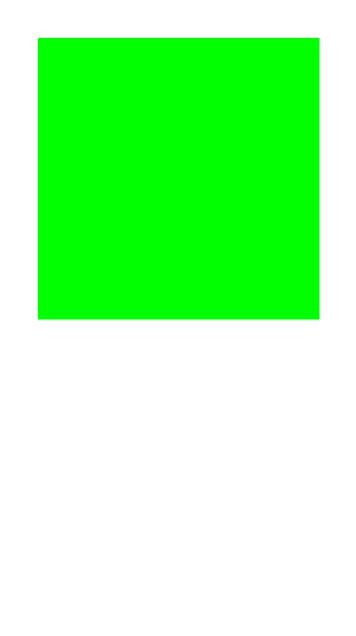

In [9]:
# Generate a list of colors with a length equal to the number of labels
colors = distinctipy.get_colors(len(class_names))

# Make a copy of the color map in integer format
int_colors = [tuple(int(c*255) for c in color) for color in colors]

# Generate a color swatch to visualize the color map
distinctipy.color_swatch(colors)

#### Download a font file

In [10]:
# Set the name of the font file
font_file = 'KFOlCnqEu92Fr1MmEU9vAw.ttf'

# Download the font file
download_file(f"https://fonts.gstatic.com/s/roboto/v30/{font_file}", "./")

The file ./KFOlCnqEu92Fr1MmEU9vAw.ttf already exists and overwrite is set to False.


#### Inspect the corresponding annotation data

In [11]:
# Get the row from the 'annotation_df' DataFrame corresponding to the 'file_id'
annotation_df.iloc[0].to_frame()

,258421
version,5.3.1
flags,{}
shapes,"[{'label': 'person', 'points': [[340.2519836425781, 466.943359375], [418.9939880371094, 777.34423828125]], 'group_id': None, 'description': '', 'shape_type': 'rectangle', 'flags': {}}, {'label': 'person', 'points': [[386.076124567474, 443.94463667820065], [460.81660899653974, 777.1626297577855]], 'group_id': None, 'description': '', 'shape_type': 'rectangle', 'flags': {}}]"
imagePath,258421.jpg
imageData,None
imageHeight,1152
imageWidth,768


In [12]:
import xml.etree.ElementTree as ET
import xml.dom.minidom

def prettify(elem):
    """Return a pretty-printed XML string for the Element."""
    rough_string = ET.tostring(elem, 'utf-8')
    reparsed = xml.dom.minidom.parseString(rough_string)
    return reparsed.toprettyxml(indent="  ")

def convert_boxes(boxes):
    """Convert boxes from custom format to CVAT format."""
    converted = []
    for image_boxes in boxes:
        image_converted = []
        for box in image_boxes:
            for label, coords in box.items():
                cvat_box = {
                    "label": label,
                    "xtl": str(coords[0]),
                    "ytl": str(coords[1]),
                    "xbr": str(coords[2]),
                    "ybr": str(coords[3])
                }
                image_converted.append(cvat_box)
        converted.append(image_converted)
    return converted

def create_cvat_xml(labels, boxes, colors, dims, image_names, file_name):
    converted_boxes = convert_boxes(boxes)

    annotations = ET.Element("annotations")
    version = ET.SubElement(annotations, "version")
    version.text = "1.1"

    # Meta information (modify as needed)
    meta = ET.SubElement(annotations, "meta")
    task = ET.SubElement(meta, "task")
    ET.SubElement(task, "id").text = "1"  # Example ID
    ET.SubElement(task, "name").text = "Image Annotation Task"
    ET.SubElement(task, "size").text = str(len(dims))
    ET.SubElement(task, "mode").text = "annotation"
    ET.SubElement(task, "overlap").text = "0"

    # Defining labels
    labels_elem = ET.SubElement(task, "labels")
    for label, color in zip(labels, colors):
        label_elem = ET.SubElement(labels_elem, "label")
        ET.SubElement(label_elem, "name").text = label
        ET.SubElement(label_elem, "color").text = f"#{color[0]:02x}{color[1]:02x}{color[2]:02x}"
        ET.SubElement(label_elem, "type").text = "rectangle"

    # Images and bounding boxes
    for i, (dim, boxes_per_image, image_name) in enumerate(zip(dims, converted_boxes, image_names)):
        image_elem = ET.SubElement(annotations, "image", id=str(i), name=image_name, width=str(dim[0]), height=str(dim[1]))
        for box in boxes_per_image:
            ET.SubElement(image_elem, "box", label=box["label"], xtl=box["xtl"], ytl=box["ytl"], xbr=box["xbr"], ybr=box["ybr"], occluded="0")

    # Writing to file with pretty print
    with open(file_name, "w") as file:
        file.write(prettify(annotations))

In [13]:
boxes = [[{ shape['label'] : np.array(shape['points']).reshape(4).tolist()} for shape in shapes] for shapes in annotation_df['shapes']]
colors = int_colors
dims = annotation_df[['imageHeight', 'imageWidth']].values.tolist()

create_cvat_xml(class_names, boxes, colors, dims, annotation_df.index.tolist(), "labelme-to-cvat-bounding-box-annotations.xml")